In [2]:
#@title ✅  1. Mount Drive
import os
from google.colab import drive

# 1. Hapus semua file 'sisa' di dalam folder mountpoint /content/drive
# Perintah ini aman dan hanya membersihkan folder sementara di sesi Colab ini
print("Membersihkan folder sementara /content/drive/...")
!rm -rf /content/drive/*
print("Pembersihan selesai.")

# 2. Sekarang coba mount ulang Google Drive
# Karena folder 'pintu gerbang' sudah kosong, perintah ini akan berhasil
print("\nMencoba menghubungkan kembali Google Drive...")
try:
    drive.mount('/content/drive')
    print("✅ Sukses! Google Drive Anda sudah terhubung kembali.")
    print("\nSekarang Anda bisa melanjutkan pengecekan file Anda.")
    # Verifikasi cepat bahwa drive sudah terhubung
    !ls "/content/drive/MyDrive"
except Exception as e:
    print(f"❌ Gagal mount. Error: {e}")

Membersihkan folder sementara /content/drive/...
Pembersihan selesai.

Mencoba menghubungkan kembali Google Drive...
Mounted at /content/drive
✅ Sukses! Google Drive Anda sudah terhubung kembali.

Sekarang Anda bisa melanjutkan pengecekan file Anda.
'bukti pembayaran.pdf'
'Colab Notebooks'
'Copy of DJI_0169.MP4'
'Copy of Pengajuan PC Multimedia.xlsx'
 Developments
 Documents
'Draf Jurnal Ilmiah Penelitian Ritel (Revisi Kutipan).gdoc'
'Draf Jurnal Ilmiah Penelitian Ritel (Revisi Ringkas).gdoc'
'English Language Arts Thesis by Slidesgo.pptx'
'e-ticket spesialshow.pdf'
 Event
'Graphic Design'
 IMG_0682.jpeg
'Jual Sepatu Custom Sneacus Majalengka.gsite'
 Kuliah
'Model Prediktif Risiko Keracunan Pangan Program MBG di Indonesia (1).gdoc'
'Model Prediktif Risiko Keracunan Pangan Program MBG di Indonesia.gdoc'
'Model Risiko Keracunan Pangan MBG Indonesia (Revisi Akhir).gdoc'
 MyDrive
 New
 news.gsheet
 nilai_cetak_ksm.pdf
 object-detection
'Pengajuan PC Multimedia.xlsx'
'PERHITUNGAN JUALAN DIM

In [3]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.4 MB/s eta 0:00:00


In [ ]:
#@title 🚀 2. Script Otomatis untuk Membagi Dataset (Train, Val, Test)
import os
import random
import shutil
from tqdm import tqdm

# --- KONFIGURASI ---
# Sesuaikan path ini jika nama folder di dalam ZIP Anda berbeda
UNIVERSAL_IMAGES_DIR = "/content/drive/MyDrive/object-detection/paper1/universal-data/images"
UNIVERSAL_LABELS_DIR = "/content/drive/MyDrive/object-detection/paper1/universal-data/labels"

# Path tujuan di mana struktur train/val/test akan dibuat
DESTINATION_DIR = "/content/drive/MyDrive/object-detection/paper1/dataset"

# Tentukan rasio pembagian dataset
TRAIN_RATIO = 0.7  # 70% untuk data training
VAL_RATIO = 0.2    # 20% untuk data validasi
TEST_RATIO = 0.1   # 10% untuk data testing
# --- AKHIR KONFIGURASI ---

print("Memulai proses pembagian dataset...")

# 1. Membuat direktori tujuan
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(DESTINATION_DIR, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(DESTINATION_DIR, 'labels', split), exist_ok=True)

# 2. Mendapatkan daftar semua file gambar
image_files = [f for f in os.listdir(UNIVERSAL_IMAGES_DIR) if f.endswith(('.jpg', '.jpeg', '.png'))]
print(f"Total ditemukan {len(image_files)} gambar.")

# 3. Mengacak urutan file
random.shuffle(image_files)

# 4. Menghitung jumlah file untuk setiap set
total_files = len(image_files)
train_count = int(total_files * TRAIN_RATIO)
val_count = int(total_files * VAL_RATIO)
test_count = total_files - train_count - val_count # Sisa untuk test set

# 5. Membagi file ke dalam list masing-masing
train_files = image_files[:train_count]
val_files = image_files[train_count : train_count + val_count]
test_files = image_files[train_count + val_count:]

print(f"Pembagian: {len(train_files)} train, {len(val_files)} val, {len(test_files)} test.")

# 6. Fungsi untuk menyalin file gambar dan labelnya
def copy_files(file_list, destination_split):
    print(f"\nMenyalin file ke set: {destination_split}")
    for filename in tqdm(file_list):
        basename = os.path.splitext(filename)[0]
        image_ext = os.path.splitext(filename)[1]
        label_filename = basename + '.txt'

        # Path sumber
        src_image_path = os.path.join(UNIVERSAL_IMAGES_DIR, filename)
        src_label_path = os.path.join(UNIVERSAL_LABELS_DIR, label_filename)

        # Path tujuan
        dest_image_path = os.path.join(DESTINATION_DIR, 'images', destination_split, filename)
        dest_label_path = os.path.join(DESTINATION_DIR, 'labels', destination_split, label_filename)

        # Melakukan penyalinan
        if os.path.exists(src_label_path):
            shutil.copy(src_image_path, dest_image_path)
            shutil.copy(src_label_path, dest_label_path)
        else:
            print(f"Peringatan: File label {label_filename} tidak ditemukan, gambar {filename} dilewati.")

# 7. Menjalankan fungsi penyalinan untuk setiap set
copy_files(train_files, 'train')
copy_files(val_files, 'val')
copy_files(test_files, 'test')

print("\n🎉 Proses pembagian dataset selesai!")

Memulai proses pembagian dataset...
Total ditemukan 152 gambar.
Pembagian: 106 train, 30 val, 16 test.

Menyalin file ke set: train


100%|██████████| 106/106 [00:53<00:00,  2.00it/s]



Menyalin file ke set: val


100%|██████████| 30/30 [00:11<00:00,  2.53it/s]



Menyalin file ke set: test


100%|██████████| 16/16 [00:07<00:00,  2.28it/s]


🎉 Proses pembagian dataset selesai!


In [ ]:
#@title 3.Menghapus background setiap produk
import cv2
import os
from tqdm import tqdm

IMAGE_DIR = "/content/drive/MyDrive/object-detection/paper1/dataset/images"
LABEL_DIR = "/content/drive/MyDrive/object-detection/paper1/dataset/labels"
OUTPUT_DIR = "/content/drive/MyDrive/object-detection/paper1/_temp_cropped_products"
CLASS_NAMES = ['gula batu',
               'gula pasir 1/4kg',
               'kecap bango 720g',
               'kecap bango 77g',
               'micin sasa 250g',
               'micin sasa 30g',
               'mie indomie aceh',
               'mie indomie ayam bawang',
               'mie indomie ayam geprek',
               'mie indomie ayam spesial',
               'mie indomie empal gentong',
               'mie indomie goreng',
               'mie sarimi ayam bawang',
               'mie sarimi ayam kremes',
               'mie sarimi iga sapi',
               'mie sarimi kaldu ayam',
               'mie sedaap goreng',
               'mie sedaap soto',
               'mie suksess isi 2 ayam kecap',
               'pakan ayam 511',
               'pakan ayan 511/h11',
               'pakan burung perkutut',
               'rokok onbold 12btg',
               'rokok onbold 20btg',
               'rokok satya',
               'rokok sayapmas',
               'sambal abc extra pedas botol 130ml',
               'terigu 1/4kg'] # SESUAIKAN

os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"Hasil potongan akan disimpan di: {OUTPUT_DIR}")

for split in ['train', 'val', 'test']:
    print(f"\nProcessing split: {split}")
    split_image_dir = os.path.join(IMAGE_DIR, split)
    split_label_dir = os.path.join(LABEL_DIR, split)
    split_output_dir = os.path.join(OUTPUT_DIR, split)

    os.makedirs(split_output_dir, exist_ok=True)

    image_files = [f for f in os.listdir(split_image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for image_filename in tqdm(image_files):
        image_path = os.path.join(split_image_dir, image_filename)
        label_filename = os.path.splitext(image_filename)[0] + '.txt'
        label_path = os.path.join(split_label_dir, label_filename)

        if not os.path.exists(label_path):
            print(f"Warning: Label file not found for {image_filename}, skipping.")
            continue

        img = cv2.imread(image_path)
        if img is None:
            print(f"Warning: Could not read image {image_filename}, skipping.")
            continue

        height, width, _ = img.shape

        with open(label_path, 'r') as f:
            for line in f.readlines():
                parts = line.strip().split()
                class_id = int(parts[0])
                # YOLO format: class_id center_x center_y width height (normalized)
                center_x, center_y, bbox_width, bbox_height = map(float, parts[1:])

                # Convert normalized coordinates to pixel coordinates
                x_center = int(center_x * width)
                y_center = int(center_y * height)
                w = int(bbox_width * width)
                h = int(bbox_height * height)

                # Calculate top-left and bottom-right corner coordinates
                x1 = int(x_center - w / 2)
                y1 = int(y_center - h / 2)
                x2 = int(x_center + w / 2)
                y2 = int(y_center + h / 2)

                # Ensure coordinates are within image boundaries
                x1 = max(0, x1)
                y1 = max(0, y1)
                x2 = min(width, x2)
                y2 = min(height, y2)

                # Crop the object
                cropped_img = img[y1:y2, x1:x2]

                # Generate output filename (e.g., image_filename_classid_bboxindex.jpg)
                output_filename = f"{os.path.splitext(image_filename)[0]}_{class_id}_{x1}_{y1}{os.path.splitext(image_filename)[1]}"
                output_path = os.path.join(split_output_dir, output_filename)

                # Save the cropped image
                cv2.imwrite(output_path, cropped_img)

print("\n🎉 Cropping products completed!")

Hasil potongan akan disimpan di: /content/drive/MyDrive/object-detection/paper1/_temp_cropped_products

Processing split: train


100%|██████████| 106/106 [00:37<00:00,  2.86it/s]



Processing split: val


100%|██████████| 30/30 [00:10<00:00,  2.84it/s]



Processing split: test


100%|██████████| 16/16 [00:05<00:00,  2.88it/s]


🎉 Cropping products completed!


In [ ]:
#@title 4.Buat & Verifikasi `retail_data.yaml` ✅
import yaml

# Periksa jumlah kelas Anda. Seharusnya 28.
# Ganti daftar 'names' di bawah ini dengan nama 28 produk Anda secara berurutan.
# Urutan ini HARUS sama dengan urutan saat Anda anotasi di LabelImg.
class_names = ['gula batu',
               'gula pasir 1/4kg',
               'kecap bango 720g',
               'kecap bango 77g',
               'micin sasa 250g',
               'micin sasa 30g',
               'mie indomie aceh',
               'mie indomie ayam bawang',
               'mie indomie ayam geprek',
               'mie indomie ayam spesial',
               'mie indomie empal gentong',
               'mie indomie goreng',
               'mie sarimi ayam bawang',
               'mie sarimi ayam kremes',
               'mie sarimi iga sapi',
               'mie sarimi kaldu ayam',
               'mie sedaap goreng',
               'mie sedaap soto',
               'mie suksess isi 2 ayam kecap',
               'pakan ayam 511',
               'pakan ayan 511/h11',
               'pakan burung perkutut',
               'rokok onbold 12btg',
               'rokok onbold 20btg',
               'rokok satya',
               'rokok sayapmas',
               'sambal abc extra pedas botol 130ml',
               'terigu 1/4kg'] # SESUAIKAN

# Path dataset di dalam Google Drive (seharusnya sudah benar)
train_path = os.path.join(PROJECT_PATH, 'dataset/images/train')
val_path = os.path.join(PROJECT_PATH, 'dataset/images/val')
test_path = os.path.join(PROJECT_PATH, 'dataset/images/test')

# Membuat dictionary untuk file YAML
yaml_data = {
    'train': train_path,
    'val': val_path,
    'test': test_path,
    'nc': len(class_names),
    'names': class_names
}

# Menulis file YAML
with open('retail_data.yaml', 'w') as f:
    yaml.dump(yaml_data, f, sort_keys=False)

print("File 'retail_data.yaml' berhasil dibuat/diperbarui.")
print("--- Isi File ---")
!cat retail_data.yaml

File 'retail_data.yaml' berhasil dibuat/diperbarui.
--- Isi File ---
train: /content/drive/MyDrive/object-detection/paper1/dataset/images/train
val: /content/drive/MyDrive/object-detection/paper1/dataset/images/val
test: /content/drive/MyDrive/object-detection/paper1/dataset/images/test
nc: 28
names:
- gula batu
- gula pasir 1/4kg
- kecap bango 720g
- kecap bango 77g
- micin sasa 250g
- micin sasa 30g
- mie indomie aceh
- mie indomie ayam bawang
- mie indomie ayam geprek
- mie indomie ayam spesial
- mie indomie empal gentong
- mie indomie goreng
- mie sarimi ayam bawang
- mie sarimi ayam kremes
- mie sarimi iga sapi
- mie sarimi kaldu ayam
- mie sedaap goreng
- mie sedaap soto
- mie suksess isi 2 ayam kecap
- pakan ayam 511
- pakan ayan 511/h11
- pakan burung perkutut
- rokok onbold 12btg
- rokok onbold 20btg
- rokok satya
- rokok sayapmas
- sambal abc extra pedas botol 130ml
- terigu 1/4kg


In [ ]:
#@title 5.Jalankan Eksperimen 1: Baseline (Transfer Learning)
from ultralytics import YOLO

# Load model pre-trained yolov8n (nano)
model_baseline = YOLO('yolov8n.pt')

print("Memulai pelatihan model baseline...")
# Melatih model
results_baseline = model_baseline.train(
    data='retail_data.yaml',
    epochs=150,  # Anda bisa mulai dengan 150, bisa ditambah jika perlu
    imgsz=640,
    batch=8,
    name='exp1_baseline',
    project='runs/detect',
    exist_ok=True # Izinkan menimpa folder jika ada
)
print("Pelatihan baseline selesai.")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Memulai pelatihan model baseline...
Ultralytics 8.3.193 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=retail_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=Fa

In [ ]:
#@title 6.Jalankan Eksperimen 2: Augmentasi Lanjutan
from ultralytics import YOLO

# Load model pre-trained yolov8n lagi untuk eksperimen baru
model_aug = YOLO('yolov8n.pt')

print("Memulai pelatihan model dengan augmentasi lanjutan...")
results_aug = model_aug.train(
    data='retail_data.yaml',
    epochs=150,
    imgsz=640,
    batch=8,
    name='exp2_advanced_augmentation',
    project='runs/detect',
    exist_ok=True,
    # Parameter augmentasi
    mosaic=1.0,    # Mengaktifkan augmentasi mosaic
    mixup=0.1,     # Mengaktifkan augmentasi mixup
    copy_paste=0.1 # Mengaktifkan augmentasi copy-paste
)
print("Pelatihan dengan augmentasi lanjutan selesai.")

Memulai pelatihan model dengan augmentasi lanjutan...
Ultralytics 8.3.193 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=retail_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp2_advanced_augmentation, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_

In [ ]:
#@title 7.1. Buat Data Sintetis
import os
import cv2
import numpy as np
import random
from tqdm import tqdm
from PIL import Image
import re

print("--- Memulai Bagian 5.1: Membuat Data Sintetis ---")

# --- Konfigurasi ---
PROJECT_PATH = "/content/drive/MyDrive/object-detection/paper1"

# --- PERUBAHAN DI SINI ---
# Path disesuaikan agar 100% cocok dengan nama folder Anda (menggunakan hyphen)
SOURCE_PRODUCTS_DIR = os.path.join(PROJECT_PATH, "synthetic-assets/source-products")
SOURCE_BACKGROUNDS_DIR = os.path.join(PROJECT_PATH, "synthetic-assets/source-backgrounds")
# --- AKHIR PERUBAHAN ---

OUTPUT_IMAGES_DIR = os.path.join(PROJECT_PATH, "generated_dataset/images")
OUTPUT_LABELS_DIR = os.path.join(PROJECT_PATH, "generated_dataset/labels")
NUM_SYNTHETIC_IMAGES = 1000
CLASS_NAMES = [
    'gula batu', 'gula pasir 1/4kg', 'kecap bango 720g', 'kecap bango 77g',
    'micin sasa 250g', 'micin sasa 30g', 'mie indomie aceh', 'mie indomie ayam bawang',
    'mie indomie ayam geprek', 'mie indomie ayam spesial', 'mie indomie empal gentong',
    'mie indomie goreng', 'mie sarimi ayam bawang', 'mie sarimi ayam kremes',
    'mie sarimi iga sapi', 'mie sarimi kaldu ayam', 'mie sedaap goreng',
    'mie sedaap soto', 'mie suksess isi 2 ayam kecap', 'pakan ayam 511',
    'pakan ayan 511/h11', 'pakan burung perkutut', 'rokok onbold 12btg',
    'rokok onbold 20btg', 'rokok satya', 'rokok sayapmas',
    'sambal abc extra pedas botol 130ml', 'terigu 1/4kg'
]
MIN_PRODUCTS_PER_IMAGE = 4
MAX_PRODUCTS_PER_IMAGE = 10
SCALE_RANGE = (0.4, 1.2)
# --- Akhir Konfigurasi ---

os.makedirs(OUTPUT_IMAGES_DIR, exist_ok=True)
os.makedirs(OUTPUT_LABELS_DIR, exist_ok=True)

# Membuat peta dari nama kelas asli ke nama kelas yang "aman" (safe)
safe_class_names_map = {re.sub(r'[^a-zA-Z0-9]', '_', name): name for name in CLASS_NAMES}

product_assets = []
for filename in os.listdir(SOURCE_PRODUCTS_DIR):
    if filename.lower().endswith('.png'):
        # Ekstrak nama dasar (misal: 'mie_indomie_goreng' dari 'mie_indomie_goreng_1.png')
        base_name = '_'.join(filename.split('_')[:-1])

        if base_name in safe_class_names_map:
            original_class_name = safe_class_names_map[base_name]
            path = os.path.join(SOURCE_PRODUCTS_DIR, filename)
            img_pil = Image.open(path).convert("RGBA")
            product_assets.append({'image': np.array(img_pil), 'name': original_class_name})

background_assets = [os.path.join(SOURCE_BACKGROUNDS_DIR, f) for f in os.listdir(SOURCE_BACKGROUNDS_DIR) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

if not product_assets or not background_assets:
    print("❌ Error: Pastikan file di 'source-products' sudah diganti namanya dan ada gambar di 'source-backgrounds'.")
    print(f"Jumlah aset produk yang berhasil dikenali: {len(product_assets)}")
else:
    print(f"✅ Memuat {len(product_assets)} aset produk dan {len(background_assets)} aset background.")
    for i in tqdm(range(NUM_SYNTHETIC_IMAGES), desc="Membuat Gambar Sintetis"):
        bg_path = random.choice(background_assets)
        background = cv2.cvtColor(np.array(Image.open(bg_path).convert("RGB")), cv2.COLOR_RGB2BGR)
        bg_h, bg_w, _ = background.shape
        annotations = []
        num_products_to_add = random.randint(MIN_PRODUCTS_PER_IMAGE, MAX_PRODUCTS_PER_IMAGE)

        for _ in range(num_products_to_add):
            product_asset = random.choice(product_assets)
            product_img_rgba = product_asset['image']
            product_name = product_asset['name']
            scale_factor = random.uniform(SCALE_RANGE[0], SCALE_RANGE[1])
            new_h = int(product_img_rgba.shape[0] * scale_factor)
            new_w = int(product_img_rgba.shape[1] * scale_factor)
            if new_h > bg_h or new_w > bg_w or new_h == 0 or new_w == 0: continue
            product_resized = cv2.resize(product_img_rgba, (new_w, new_h))
            x_offset = random.randint(0, bg_w - new_w)
            y_offset = random.randint(0, bg_h - new_h)
            alpha = product_resized[:, :, 3] / 255.0
            bg_roi = background[y_offset:y_offset+new_h, x_offset:x_offset+new_w]
            for c in range(0, 3):
                bg_roi[:, :, c] = (alpha * product_resized[:, :, c] + (1 - alpha) * bg_roi[:, :, c])
            background[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = bg_roi
            x_center, y_center = (x_offset + new_w / 2) / bg_w, (y_offset + new_h / 2) / bg_h
            width, height = new_w / bg_w, new_h / bg_h
            class_id = CLASS_NAMES.index(product_name)
            annotations.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

        img_filename = f"synthetic_{i:04d}.jpg"
        cv2.imwrite(os.path.join(OUTPUT_IMAGES_DIR, img_filename), background)
        label_filename = f"synthetic_{i:04d}.txt"
        with open(os.path.join(OUTPUT_LABELS_DIR, label_filename), 'w') as f:
            f.write("\n".join(annotations))

    print(f"\n✅ Selesai! {NUM_SYNTHETIC_IMAGES} gambar sintetis telah dibuat.")

--- Memulai Bagian 5.1: Membuat Data Sintetis ---
✅ Memuat 84 aset produk dan 9 aset background.


Membuat Gambar Sintetis: 100%|██████████| 1000/1000 [04:40<00:00,  3.57it/s]


✅ Selesai! 1000 gambar sintetis telah dibuat.


In [ ]:
#@title 7.2 Verifikasi Generated Syntethic Dataset
import os

OUTPUT_IMAGES_DIR = "/content/drive/MyDrive/object-detection/paper1/generated_dataset/images"
OUTPUT_LABELS_DIR = "/content/drive/MyDrive/object-detection/paper1/generated_dataset/labels"

# Cek apakah direktori ada
if not os.path.exists(OUTPUT_IMAGES_DIR) or not os.path.exists(OUTPUT_LABELS_DIR):
    print("❌ Gagal! Folder 'generated_dataset' tidak ditemukan.")
else:
    num_images = len(os.listdir(OUTPUT_IMAGES_DIR))
    num_labels = len(os.listdir(OUTPUT_LABELS_DIR))

    print(f"Verifikasi folder 'generated_dataset':")
    if num_images > 0 and num_labels > 0 and num_images == num_labels:
        print(f"✅ Sukses! Ditemukan {num_images} gambar dan {num_labels} label.")
    else:
        print(f"❌ Gagal! Ditemukan {num_images} gambar dan {num_labels} label. Jumlahnya harus sama dan lebih dari 0.")

Verifikasi folder 'generated_dataset':
✅ Sukses! Ditemukan 1000 gambar dan 1000 label.


In [ ]:
#@title 7.3 Gabungkan Data Sintetis & Data Asli
import os
import shutil
from tqdm import tqdm

print("--- Memulai Penggabungan Data Sintetis ---")

PROJECT_PATH = "/content/drive/MyDrive/object-detection/paper1"
OUTPUT_IMAGES_DIR = os.path.join(PROJECT_PATH, "generated_dataset/images")
OUTPUT_LABELS_DIR = os.path.join(PROJECT_PATH, "generated_dataset/labels")
TRAIN_IMG_DIR = os.path.join(PROJECT_PATH, 'dataset/images/train')
TRAIN_LBL_DIR = os.path.join(PROJECT_PATH, 'dataset/labels/train')

# Salin gambar sintetis
generated_images = os.listdir(OUTPUT_IMAGES_DIR)
for img_file in tqdm(generated_images, desc="Menyalin Gambar Sintetis"):
    shutil.copy(os.path.join(OUTPUT_IMAGES_DIR, img_file), TRAIN_IMG_DIR)

# Salin label sintetis
generated_labels = os.listdir(OUTPUT_LABELS_DIR)
for lbl_file in tqdm(generated_labels, desc="Menyalin Label Sintetis"):
    shutil.copy(os.path.join(OUTPUT_LABELS_DIR, lbl_file), TRAIN_LBL_DIR)

print("\n✅ Penggabungan data selesai.")

--- Memulai Penggabungan Data Sintetis ---


Menyalin Label Sintetis: 100%|██████████| 1000/1000 [00:11<00:00, 89.18it/s]


✅ Penggabungan data selesai.


In [ ]:
#@title 7.4 Jalankan Eksperimen 3: Data Sintetis
from ultralytics import YOLO

print("--- Memulai Pelatihan Final ---")

# Inisialisasi model
model_synth = YOLO('yolov8n.pt')

# Mulai pelatihan
results_synth = model_synth.train(
    data='retail_data.yaml',
    epochs=200,
    imgsz=640,
    batch=8,
    name='exp3_synthetic_data',
    project='runs/detect',
    exist_ok=True,
    mosaic=1.0,
    mixup=0.1,
    copy_paste=0.1
)

print("\n🎉 Pelatihan final dengan data sintetis selesai!")

--- Memulai Pelatihan Final ---
Ultralytics 8.3.193 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=retail_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp3_synthetic_data, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pers

In [4]:
#@title 8.Evaluasi Semua Model & Buat Tabel Hasil
from ultralytics import YOLO
import os

# Pastikan Anda berada di direktori yang benar
PROJECT_PATH = "/content/drive/MyDrive/object-detection/paper1"
os.chdir(PROJECT_PATH)

# Path ke bobot model terbaik dari setiap eksperimen
path_best_baseline = os.path.join(PROJECT_PATH, 'runs/detect/exp1_baseline/weights/best.pt')
path_best_aug = os.path.join(PROJECT_PATH, 'runs/detect/exp2_advanced_augmentation/weights/best.pt')
path_best_synth = os.path.join(PROJECT_PATH, 'runs/detect/exp3_synthetic_data/weights/best.pt')

# Load model dari bobot terbaik
print("Memuat model yang sudah dilatih...")
model_final_baseline = YOLO(path_best_baseline)
model_final_aug = YOLO(path_best_aug)
model_final_synth = YOLO(path_best_synth)
print("Model berhasil dimuat.")

print("\n--- Mengevaluasi Model Baseline ---")
metrics_baseline = model_final_baseline.val(data='retail_data.yaml', split='val', name='eval_baseline')

print("\n--- Mengevaluasi Model Augmentasi Lanjutan ---")
metrics_aug = model_final_aug.val(data='retail_data.yaml', split='val', name='eval_aug')

print("\n--- Mengevaluasi Model Data Sintetis ---")
metrics_synth = model_final_synth.val(data='retail_data.yaml', split='val', name='eval_synth')

# Menampilkan hasil dalam format tabel (siap untuk paper Anda)
print("\n\n=======================================================")
print("          HASIL STUDI ABLASI PADA VALIDATION SET")
print("=======================================================")
print("| Metode                             | mAP50-95 | Precision | Recall  |")
print("|-------------------------------------|----------|-----------|---------|")
print(f"| 1: Baseline (Transfer Learning)     | {metrics_baseline.box.map:.4f}   | {metrics_baseline.box.mp:.4f}     | {metrics_baseline.box.mr:.4f}   |")
print(f"| 2: + Augmentasi Lanjutan          | {metrics_aug.box.map:.4f}   | {metrics_aug.box.mp:.4f}     | {metrics_aug.box.mr:.4f}   |")
print(f"| 3: + Data Sintetis                | {metrics_synth.box.map:.4f}   | {metrics_synth.box.mp:.4f}     | {metrics_synth.box.mr:.4f}   |")
print("=======================================================")

print("\n\n--- Evaluasi Final pada TEST SET dengan Model Terbaik ---")
# Uji model terbaik (sintetis) pada test set untuk hasil akhir di paper
final_metrics = model_final_synth.val(data='retail_data.yaml', split='test', name='final_test_evaluation')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Memuat model yang sudah dilatih...
Model berhasil dimuat.

--- Mengevaluasi Model Baseline ---
Ultralytics 8.3.214 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,011,108 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 3.5±1.6 MB/s, size: 2953.2 KB)
val: Scanning /content/drive/MyDrive/object-detection/paper1/dataset/labels/val.cache... 30 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 30/30 44.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 0.1it/s 31.1s
                   all         30        325  

Membuat grafik perbandingan kurva kinerja...


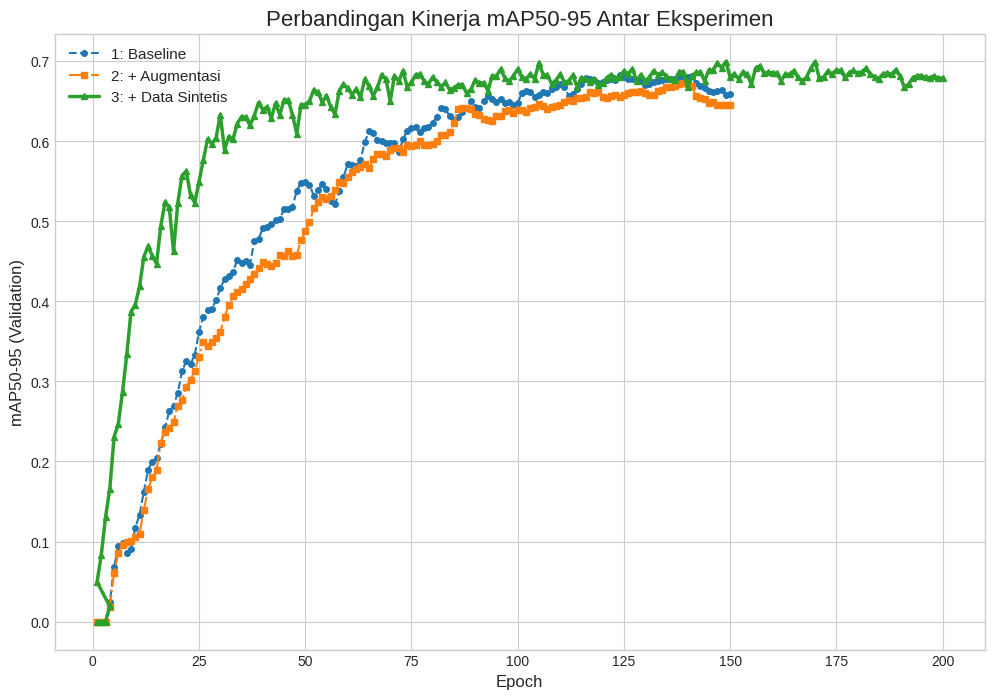


Membuat grafik perbandingan hasil akhir...


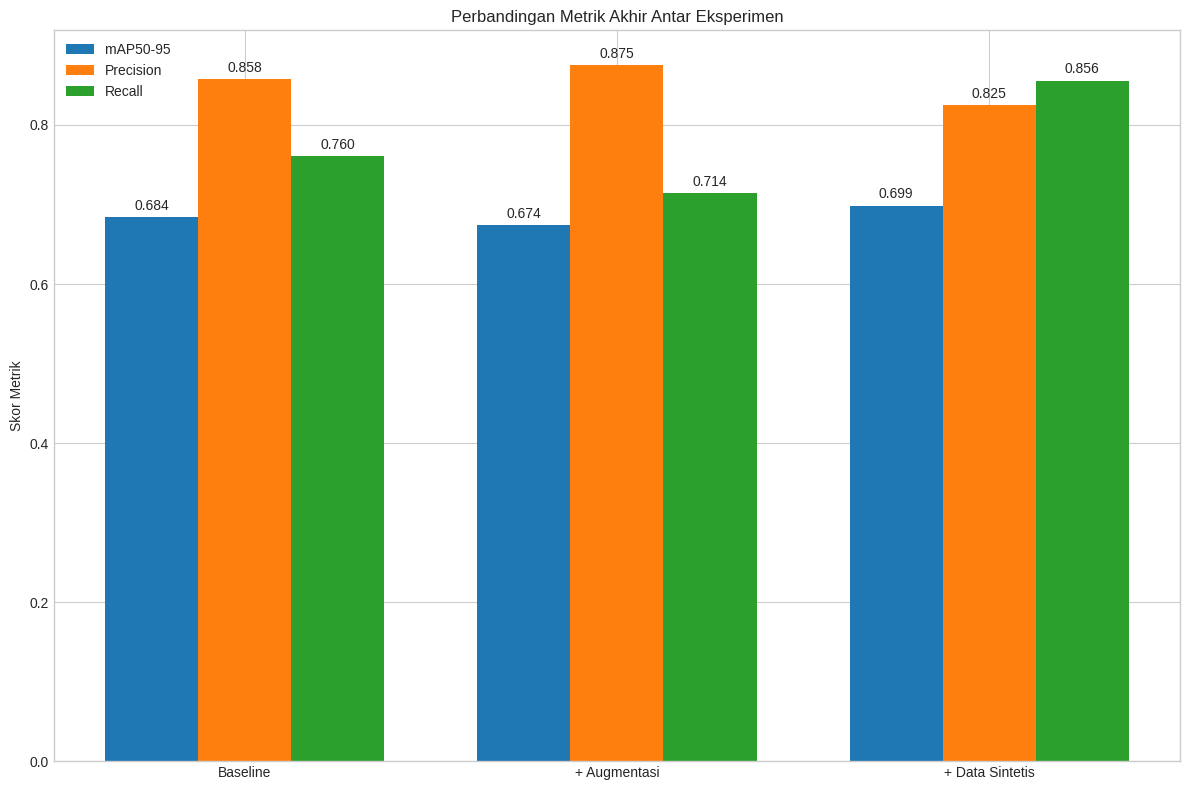

In [ ]:
#@title 9.Buat Grafik Perbandingan Kinerja
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Grafik Perbandingan Kurva Kinerja (mAP vs Epoch) ---
print("Membuat grafik perbandingan kurva kinerja...")
BASELINE_CSV = os.path.join(PROJECT_PATH, 'runs/detect/exp1_baseline/results.csv')
AUG_CSV = os.path.join(PROJECT_PATH, 'runs/detect/exp2_advanced_augmentation/results.csv')
SYNTH_CSV = os.path.join(PROJECT_PATH, 'runs/detect/exp3_synthetic_data/results.csv')

df_baseline = pd.read_csv(BASELINE_CSV); df_baseline.columns = df_baseline.columns.str.strip()
df_aug = pd.read_csv(AUG_CSV); df_aug.columns = df_aug.columns.str.strip()
df_synth = pd.read_csv(SYNTH_CSV); df_synth.columns = df_synth.columns.str.strip()

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))
plt.plot(df_baseline['epoch'], df_baseline['metrics/mAP50-95(B)'], label='1: Baseline', marker='o', markersize=4, linestyle='--')
plt.plot(df_aug['epoch'], df_aug['metrics/mAP50-95(B)'], label='2: + Augmentasi', marker='s', markersize=4, linestyle='-.')
plt.plot(df_synth['epoch'], df_synth['metrics/mAP50-95(B)'], label='3: + Data Sintetis', marker='^', markersize=5, linestyle='-', linewidth=2.5)
plt.title('Perbandingan Kinerja mAP50-95 Antar Eksperimen', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('mAP50-95 (Validation)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True)
plt.savefig(os.path.join(PROJECT_PATH, 'comparison_map_vs_epoch.png'), dpi=300)
plt.show()


# --- Grafik Perbandingan Hasil Akhir (Bar Chart) ---
print("\nMembuat grafik perbandingan hasil akhir...")
labels = ['Baseline', '+ Augmentasi', '+ Data Sintetis']
map_scores = [metrics_baseline.box.map, metrics_aug.box.map, metrics_synth.box.map]
precision_scores = [metrics_baseline.box.mp, metrics_aug.box.mp, metrics_synth.box.mp]
recall_scores = [metrics_baseline.box.mr, metrics_aug.box.mr, metrics_synth.box.mr]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, map_scores, width, label='mAP50-95')
rects2 = ax.bar(x, precision_scores, width, label='Precision')
rects3 = ax.bar(x + width, recall_scores, width, label='Recall')

ax.set_ylabel('Skor Metrik')
ax.set_title('Perbandingan Metrik Akhir Antar Eksperimen')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1, padding=3, fmt='%.3f')
ax.bar_label(rects2, padding=3, fmt='%.3f')
ax.bar_label(rects3, padding=3, fmt='%.3f')
fig.tight_layout()
plt.savefig(os.path.join(PROJECT_PATH, 'comparison_final_metrics_bar.png'), dpi=300)
plt.show()